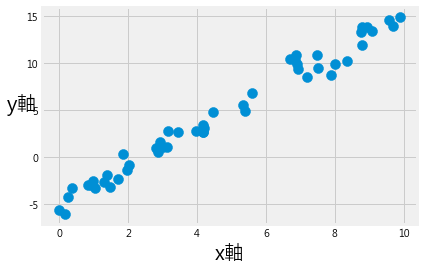

In [43]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random as random
import numpy as np

#y=ax+b
rng=np.random.RandomState(1)
#numpy.random.randn(d0, d1, …, dn)是從常態分配中返回一個或多個值 
x=10*rng.rand(50)
#numpy.random.rand(d0, d1, …, dn)的數值會產生在(0,1)之間
y=2*x-5+rng.randn(50)
plt.scatter(x,y,s=100)
plt.xlabel('x軸',fontsize=20)
plt.ylabel('y軸',fontsize=20,rotation=0)
plt.savefig('data_point')

In [44]:
def linear_regression(x,y):
  x=np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
  y=y[:,np.newaxis]
  beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
  return beta
#將x,y帶入
by_hand =linear_regression(x,y)
#print出截距項
print(by_hand[0])
#print出斜率項
print(by_hand[1])

[-4.99857709]
[2.02720881]


Text(0, 0.5, 'y軸')

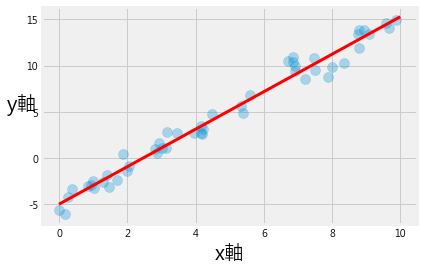

In [45]:
#任意建立新的點
xs=np.linspace(0,10,200)
ys=by_hand[0]+by_hand[1]*xs
#原本的data point
plt.scatter(x,y,s=100,alpha=0.3)
plt.plot(xs,ys,'r',linewidth=3)
plt.xlabel('x軸',fontsize=20)
plt.ylabel('y軸',rotation=0,fontsize=20)

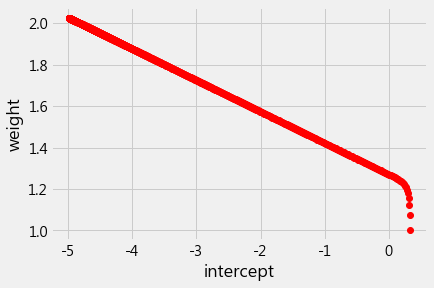

intercept: [-4.99776211]
slope: [2.02708538]


In [46]:
#Gradient Descent

learning_rate=0.0001
#經過3000次的調整參數
n_iterations=3000

#隨機定義參數值
theta = np.random.randn(2,1)
#如同最小平方法,必須加入截距項
x=np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
y=y[:,np.newaxis]
#來畫點不一樣風格的圖吧
plt.style.use('fivethirtyeight')
#開始梯度下降
for iteration in range(n_iterations):
    #求出預測的yhat值
    scores = np.dot(x,theta)
    #誤差值
    output_error = y-scores
    #x的shape(50,2) output_error的shapeｊ為(50,1) gradients為(2,1)
    gradients = 2*np.dot(x.T,output_error)
    #每次對theta
    theta += learning_rate*gradients
    plt.plot(theta[0],theta[1],'o-',color='red')

plt.xlabel('intercept',color='black')
plt.ylabel('weight',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

print('intercept:',theta[0])
print('slope:',theta[1])

Text(0, 0.5, 'y軸')

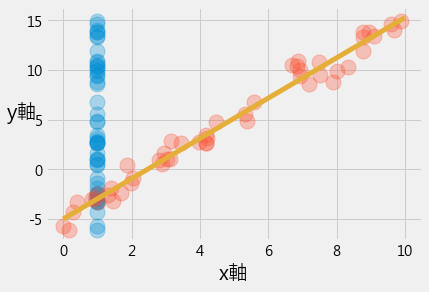

In [47]:
plt.plot(x,y,'o',markersize=15,alpha=0.3)
plt.plot(xs,theta[0]+theta[1]*xs,linewidth=5)
plt.xlabel('x軸',fontsize=20)
plt.ylabel('y軸',fontsize=20,rotation=0)